In [8]:
import numpy as np
import matplotlib .pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams["font.size"] = 20

In [2]:
ds1_train = np.genfromtxt("DS1_train.csv", delimiter=',')
ds1_test = np.genfromtxt("DS1_test.csv", delimiter=',')
ds1_valid = np.genfromtxt("DS1_valid.csv", delimiter=',')

In [3]:
# The class we will use for KNN Classifier
class KNearestNeighbors(object):
    # Initializes KNN with neighbors 3
    def __init__(self, neighbors=3):
        self.data = None
        self.neighbors = neighbors
        
        
    # Passes in training data to be used for classification
    def fit(self, data, clear=True):
        if self.data and not clear:
            self.data = np.append(self.data, data, axis=0)
            return
        self.data = data
    
    # Sets a value for neighbors
    def set_neighbors(self, neighbors):
        self.neighbors = neighbors

    # CLassifies a sample of features 
    def get_class(self, sample):
        if sample is None:
            print("Please enter a sample to classify")
        if self.data is None:
            print("Please enter data to classify sample against using fit()")
        if self.neighbors is None:
            print("Please specify number of neighbors to use")

        # Calculate and sort euclidean distance
        sample = np.reshape(sample, (1, -1))
        labels = self.data[:, -1:]
        difference = np.power(self.data[:, :-1] - sample, 2)
        vector = np.ones((20, 1))
        distance_labels = np.append(np.power(difference.dot(vector), 0.5), labels, axis=1)
        distance_labels = np.array(sorted(distance_labels, key=lambda x:x[0]))
        votes = (distance_labels[:self.neighbors, -1:].sum())/self.neighbors
        
        # If value is split assign randomly
        if votes == 0.5:
            return np.random.randint(0, 1)
        return round(votes, 0)
    

knn = KNearestNeighbors()
# Pass in our training data
knn.fit(ds1_train)

In [4]:
# We iterate through different values of K and save the one
# that provides us with the highest F1 measure
precision_vals = []
recall_vals = []
accuracy_vals = []
f1_vals = []
# When we originally ran this code, we ran it from range 1 to 204. However, in the interest of 
# submission, we reduce the scale to 150 to 204
k_vals = range(150, 204, 3)
best_k = 0
best_f1 = float('-inf')


for k in k_vals:
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    N1 = ds1_valid[:,-1].sum()
    N0 = ds1_valid.shape[0] - N1
    # We set our neighbors to our current value of k
    knn.set_neighbors(k)
    for i, sample in enumerate(ds1_valid):
        label = round(sample[-1], 0)
        pred = knn.get_class(sample[:-1])
        if pred == 0:
            tn += int(label == pred)
            fn += int(not label == pred)

        elif pred == 1:
            tp += int(label == pred)
            fp += int(not label == pred)
    precision = tp/(tp + fp)
    recall = tp/(tp + fn)
    acc = (tn + tp)/(ds1_valid.shape[0])
    f1 = (2*precision*recall)/(precision + recall)
    # We save our value for k if it gives better F1 metric 
    if f1 > best_f1:
        best_k = k
        best_f1 = f1
        
    # We save our metrics for plotting later 
    precision_vals.append(precision)
    recall_vals.append(recall)
    accuracy_vals.append(acc)
    f1_vals.append(f1)
    if k%20 == 1:
        print("k: ", k)
        print("Precision: ", precision)
        print("Recall: ", recall)
        print("Accuracy: ", acc)
        print("F1 Measure: ", f1)
        print("\n")
    
print("Best k we found, with best F1: ")
print("k: ", best_k)
print("Best Validation F1: ", best_f1)

k:  1
Precision:  0.507537688442211
Recall:  0.505
Accuracy:  0.5075
F1 Measure:  0.5062656641604011


k:  61
Precision:  0.5751295336787565
Recall:  0.555
Accuracy:  0.5725
F1 Measure:  0.5648854961832063


k:  121
Precision:  0.5743073047858942
Recall:  0.57
Accuracy:  0.57375
F1 Measure:  0.5721455457967376


k:  181
Precision:  0.5934343434343434
Recall:  0.5875
Accuracy:  0.5925
F1 Measure:  0.5904522613065327


Best k we found, with best F1: 
k:  199
Best Validation F1:  0.5982478097622027


In [5]:
# We set our neighbors to the best neighbors we were able to find
# and run through our test set
knn.set_neighbors(best_k)

tp = 0
fp = 0
fn = 0
tn = 0

for i, sample in enumerate(ds1_test):
    label = sample[-1]
    pred = knn.get_class(sample[:-1])
    if pred == 0:
        tn += int(label == pred)
        fn += int(not label == pred)
        
    elif pred == 1:
        tp += int(label == pred)
        fp += int(not label == pred)

precision = tp/(tp + fp)
recall = tp/(tp + fn)
acc = (tn + tp)/(ds1_test.shape[0])
f1 = (2*precision*recall)/(precision + recall)

In [6]:
print("Precision: ", precision)
print("Recall: ", recall)
print("Accuracy: ", acc)
print("F1 Measure: ", f1)

Precision:  0.5550351288056206
Recall:  0.5925
Accuracy:  0.55875
F1 Measure:  0.5731559854897219


We are able to see that by increasing K we increase our F1 measure.

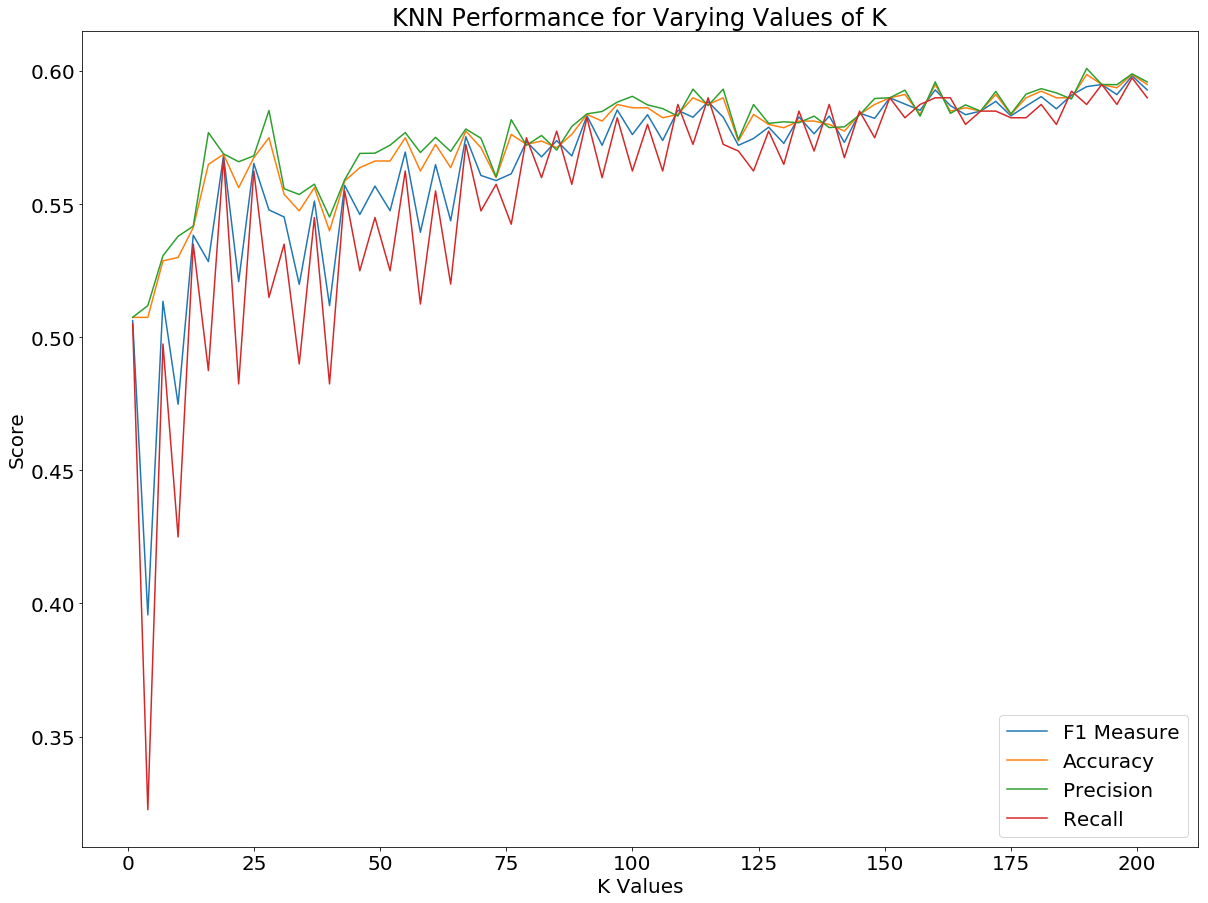

In [9]:
plt.plot(k_vals, f1_vals, label="F1 Measure")
plt.plot(k_vals, accuracy_vals, label="Accuracy")
plt.plot(k_vals, precision_vals, label="Precision")
plt.plot(k_vals, recall_vals, label="Recall")
plt.title("KNN Performance for Varying Values of K")
plt.legend(loc="lower right")
plt.xlabel("K Values")
plt.ylabel("Score")
plt.show()